# Gender Recogmiser

## Importing the libraries

In [8]:
import os
import pprint
import pickle
import joblib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from skimage.feature import hog
from skimage.io import imread,imshow
from skimage.transform import resize,rescale

np.random.seed(42)

## Preparing the datasets

Here wwe define a function to read,resize and store the data in a dictionary, containing the images,labels(gender),original filename and description. The image themselves are stored as numpy arrays containing the RGB values. The dictionary is saved into a pickle file using joblib.

In [2]:
# def resize_all(src,pklname,include,width=150,height=None):
#     '''
#     load images from path, resize them and then write them as arrays to a dictionarytogether with labels and metadata. The disctionary is 
#     written to a pickle names '{pklname}_{width}x{height}px.pkl'.
#     Parameters
#     --------------------------------
#     src: str
#         path to data
#     pklname: str
#         path to output file
#     width: int
#         target width of the image in pixels
#     include: set[str]
#         set containing str
#     '''
#     height=height if height is not None else width
#     data=dict()
#     data['discription']='resized ({0} x {1}) image in rgb'.format(int(width), int(height))
#     data['label']=[]
#     data['filename']=[]
#     data['data']=[]
#     pklname=f'{pklname}_{width}x{height}px.pkl'
#     for subdir in os.listdir(src):
#         if subdir in include:
#             print(subdir)
#             current_path=os.path.join(src, subdir)
#             for file in os.listdir(current_path):


In [3]:
image_path_men=[]
image_path_women=[]
mainpath_men='gender-recogniser/dataset/MEN'
mainpath_women='gender-recogniser/dataset/WOMAN'
for path in os.listdir(mainpath_men):
    print(path)
    image_path_men.append(os.path.join(mainpath_men, path))
print(image_path_men)
for path in os.listdir(mainpath_women):
    print(path)
    image_path_women.append(os.path.join(mainpath_women, path))
print(image_path_women)


20240609_175821.jpg
20240609_175941.jpg
20240609_175959.jpg
20240609_180022.jpg
20240609_180035.jpg
20240609_180108.jpg
20240609_180139.jpg
20240609_180204.jpg
20240609_180239.jpg
20240609_180301.jpg
20240609_180315.jpg
20240609_180342.jpg
20240609_180401.jpg
20240609_180425.jpg
20240609_180459.jpg
20240609_180525.jpg
20240609_180539.jpg
20240609_180559.jpg
20240609_180614.jpg
20240609_180631.jpg
20240609_180651.jpg
20240609_180708.jpg
20240609_180726.jpg
20240609_180743.jpg
20240609_180807.jpg
20240609_180826.jpg
20240609_180848.jpg
20240609_180904.jpg
20240609_180945.jpg
20240609_181003.jpg
20240609_181030.jpg
20240609_181052.jpg
20240609_181137.jpg
20240609_181158.jpg
20240609_181209.jpg
20240609_181224.jpg
20240609_181243.jpg
20240609_181258.jpg
20240609_181318.jpg
20240609_181336.jpg
20240609_181351.jpg
20240609_181405.jpg
20240609_181431.jpg
20240609_181443.jpg
20240609_181455.jpg
20240609_181507.jpg
20240609_181529.jpg
20240609_181541.jpg
20240609_181603.jpg
20240609_181629.jpg


In [15]:
width=150
height=150
i=0
destination_path='gender-recogniser/combined_dataset/'
for path in image_path_men:
    img=imread(path,plugin='matplotlib')
    img=resize(img,(width,height))
    pklname=f'{i}_{width}x{height}px_M.jpg'
    joblib.dump(img,open(f'{destination_path}_{pklname}','wb'))
    i=i+1
    print(img.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 

In [16]:
width=150
height=150
i=646
destination_path='gender-recogniser/combined_dataset/'
for path in image_path_women:
    img=imread(path,plugin='matplotlib')
    img=resize(img,(width,height))
    pklname=f'{i}_{width}x{height}px_W.jpg'
    joblib.dump(img,open(f'{destination_path}_{pklname}','wb'))
    i=i+1

In [26]:
# data="gender-recogniser\combined_dataset\_0_150x150px_M.jpg"
img=imread("gender-recogniser\combined_dataset\_0_150x150px_M.jpg",plugin='simpleitk')

ImportError: SimpleITK could not be found. Please try   easy_install SimpleITK or refer to   http://simpleitk.org/ for further instructions.

* Taking the photo above as an example and we process it
* A classic approach to object recognition is HOG-SVM, which stands for Histogram of Oriented Gradients and Support Vector Machines. HOGs are used for feature reduction, in other words: for lowering the complexity of the problem, while maintaining as much variation as possible.
* To calulate an HOG,an image is divided into blocks, for example 8 x 8 pixels. For each of these blocks, the magnitude of the gradient in a given number of directions is calculated.

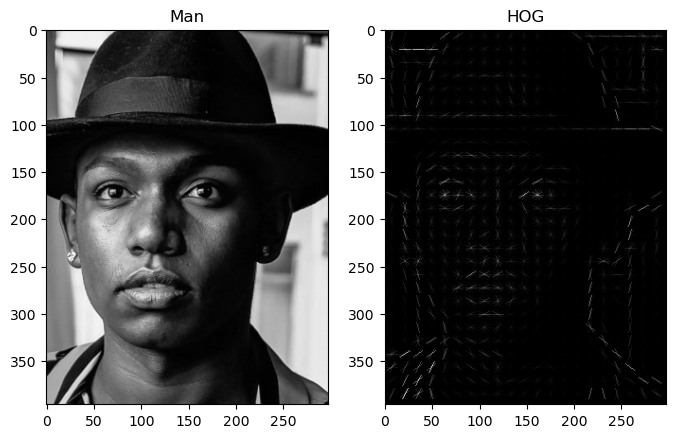

In [13]:
man=imread('gender-recogniser\dataset\MEN/20240609_175821.jpg',as_gray=True)
man=rescale(man,1/3,mode='reflect')
man_hog,man_hog_img=hog(man,pixels_per_cell=(14,14),cells_per_block=(2,2),orientations=9,visualize=True,block_norm='L2-Hys')
fig,ax=plt.subplots(1,2)
fig.set_size_inches(8,6)

ax[0].imshow(man, cmap='gray')
ax[0].set_title('Man')
ax[1].imshow(man_hog_img, cmap='gray')
ax[1].set_title('HOG')

plt.show()